Accuracy Score of Imitation: 0.75
Accuracy Score of Logistic Regression: 0.85


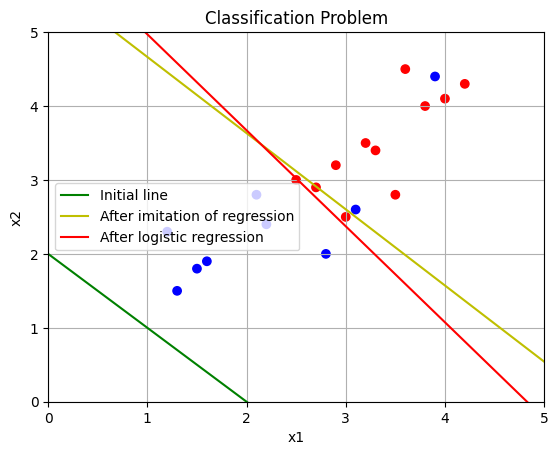

In [228]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import random
from sklearn.metrics import accuracy_score

# Create the dataset in a pandas DataFrame
data = {
    'Feature 1': [1.2, 2.1, 3.2, 3.8, 1.5, 3.0, 2.5, 2.8, 3.6, 1.3, 
                  4.0, 2.2, 3.3, 4.2, 1.6, 3.5, 2.9, 3.1, 2.7, 3.9],
    'Feature 2': [2.3, 2.8, 3.5, 4.0, 1.8, 2.5, 3.0, 2.0, 4.5, 1.5, 
                  4.1, 2.4, 3.4, 4.3, 1.9, 2.8, 3.2, 2.6, 2.9, 4.4],
    'Label': [0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 
              1, 0, 1, 1, 0, 1, 1, 0, 1, 0]
}
data = pd.DataFrame(data)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict(A, B, C, data):
    z = A * data['Feature 1'] + B * data['Feature 2'] + C
    probabilities = sigmoid(z)
    return [1 if prob >= 0.5 else 0 for prob in probabilities]

# Initialize the weights and parameters
A = 1
B = 1
C = -2
learning_rate = 0.01
x = np.linspace(-10, 10, 400)
y = (x * -A - C) / B

# Gradient Descent for Logistic Regression
for i in range(1000):
    rand = random.randint(0, data.Label.size - 1)
    X_current = data["Feature 1"][rand]
    Y_current = data["Feature 2"][rand]

    if (data.Label[rand] == 1 and (A * X_current + B * Y_current + C) < 0):
        A = A + data['Feature 1'][rand] * learning_rate
        B = B + data['Feature 2'][rand] * learning_rate
        C = C + 1 * learning_rate

    if (data.Label[rand] == 0 and (A * X_current + B * Y_current + C) > 0):
        A = A - data['Feature 1'][rand] * learning_rate
        B = B - data['Feature 2'][rand] * learning_rate
        C = C - 1 * learning_rate

# Compute the decision boundary for your logistic regression
y_new = (x * -A - C) / B

# Logistic Regression using scikit-learn
model = LogisticRegression()
model.fit(data[['Feature 1', 'Feature 2']], data['Label'])

# Compute the decision boundary for logistic regression
x_line = np.linspace(10, -10, 400)
y_line = -(model.intercept_ + model.coef_[0][0] * x_line) / model.coef_[0][1]

# Calculate accuracy
accuracy = accuracy_score(data.Label, predict(A, B, C, data))
log_accuracy = accuracy_score(data.Label,model.predict(data[['Feature 1','Feature 2']]))
print(f"Accuracy Score of Imitation: {accuracy}")
print(f"Accuracy Score of Logistic Regression: {log_accuracy}")


# Plotting the results
plt.scatter(data["Feature 1"], data['Feature 2'], color=data.Label.apply(lambda f: 'b' if f == 0 else 'r'))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Classification Problem')
plt.plot(x, y, label=r'Initial line', color='g')
plt.plot(x, y_new, label=r'After imitation of regression', color='y')
plt.plot(x_line, y_line, label=r'After logistic regression', color='r')
plt.xlim(0, 5)  # x-axis range
plt.ylim(0, 5)  # y-axis range
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid(True)
plt.show()
